# Python and Jupyter Notebook for EDA

## Notebook shortcuts

* `DD` Delete cell
* `A` Insert cell above
* `B` Insert cell below
* `X` Cut cell
* `V` Paste cell
* `ENTER` Edit cell
* `CTRL+ENTER` Execute cell
* `SHIFT+ENTER` Execute cell and move to the next one

Run shell commands (eg free/df/pip)

In [46]:
!free

               total        used        free      shared  buff/cache   available
Mem:        16251804     4898548     3073004      718808     9340540    11353256
Swap:        1000444           0     1000444


## Data load and preparation

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Convert CSV to Panda dataframe

In [48]:
file_path = "car_price_dataset.csv"
df = pd.read_csv(file_path)

Check dataframe shape (dimensions)

In [49]:
df.shape

(10000, 10)

See dataframe information

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


Convert brand, fule type and door columns to categorical (astype category)

In [51]:
df['Brand'] = df['Brand'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
#df['Year'] = df['Year'].astype('category')
df['Doors'] = df['Doors'].astype('category')

Look at dtypes after conversion

In [52]:
df.dtypes

Brand           category
Model             object
Year               int64
Engine_Size      float64
Fuel_Type       category
Transmission      object
Mileage            int64
Doors           category
Owner_Count        int64
Price              int64
dtype: object

Compare memory usage after conversion

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Brand         10000 non-null  category
 1   Model         10000 non-null  object  
 2   Year          10000 non-null  int64   
 3   Engine_Size   10000 non-null  float64 
 4   Fuel_Type     10000 non-null  category
 5   Transmission  10000 non-null  object  
 6   Mileage       10000 non-null  int64   
 7   Doors         10000 non-null  category
 8   Owner_Count   10000 non-null  int64   
 9   Price         10000 non-null  int64   
dtypes: category(3), float64(1), int64(4), object(2)
memory usage: 577.1+ KB


## Data exploration

Look at the first rows of the dataframe

In [54]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


Look at the last row of the dataframe

In [55]:
df.tail(1)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
9999,Volkswagen,Tiguan,2001,2.1,Diesel,Manual,157882,3,3,3342


Show descriptive statistics

In [56]:
df.describe()

,Year,Engine_Size,Mileage,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,18301.00000


In [57]:
# Adjust display precision (panda set option)
pd.set_option("display.precision", 2)
df.describe()

,Year,Engine_Size,Mileage,Owner_Count,Price
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,2011.54,3.00,149239.11,2.99,8852.96
std,6.90,1.15,86322.35,1.42,3112.60
min,2000.00,1.00,25.00,1.00,2000.00
25%,2006.00,2.00,74649.25,2.00,6646.00
50%,2012.00,3.00,149587.00,3.00,8858.50
75%,2017.00,4.00,223577.50,4.00,11086.50
max,2023.00,5.00,299947.00,5.00,18301.00


In [58]:
# Top 5 most expensive cars
df.nlargest(5, 'Price')

# Top 5 cheapest cars
df.nsmallest(5, 'Price')

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
232,BMW,X5,2002,2.9,Petrol,Manual,296864,4,2,2000
351,Mercedes,E-Class,2000,1.1,Diesel,Manual,233776,2,3,2000
636,Chevrolet,Malibu,2000,2.8,Petrol,Manual,280108,5,3,2000
778,Ford,Focus,2001,1.2,Petrol,Semi-Automatic,219120,3,4,2000
959,Mercedes,C-Class,2001,1.4,Hybrid,Manual,252576,5,1,2000


In [59]:
# Describe single column
df['Year'].describe()

count    10000.00
mean      2011.54
std          6.90
min       2000.00
25%       2006.00
50%       2012.00
75%       2017.00
max       2023.00
Name: Year, dtype: float64

In [60]:
# Count not-null values
df.count()

Brand           10000
Model           10000
Year            10000
Engine_Size     10000
Fuel_Type       10000
Transmission    10000
Mileage         10000
Doors           10000
Owner_Count     10000
Price           10000
dtype: int64

In [61]:
# Count values in a category column (value_counts)
df["Fuel_Type"].value_counts()

Fuel_Type
Electric    2625
Diesel      2512
Hybrid      2453
Petrol      2410
Name: count, dtype: int64

In [62]:
# Show rows 1 to 5, columns 3 to 4 (indexed location)
df.iloc[1:6, 3:9]

,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count
1,2.0,Hybrid,Automatic,5356,2,3
2,4.2,Diesel,Automatic,231440,4,2
3,2.0,Electric,Manual,160971,2,1
4,2.6,Hybrid,Semi-Automatic,286618,3,3
5,2.7,Petrol,Automatic,157889,4,4


In [63]:
# Sort Mileage (by, ascending)
sorted_data = df.sort_values(by=['Mileage'], ascending=[False])
sorted_data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
7838,Chevrolet,Equinox,2017,2.5,Electric,Manual,299947,2,4,7701
1339,Toyota,RAV4,2008,4.9,Electric,Semi-Automatic,299872,5,5,7402
3211,Honda,Accord,2012,3.6,Hybrid,Semi-Automatic,299818,2,1,6303
4929,Honda,CR-V,2016,4.3,Petrol,Semi-Automatic,299754,2,2,7204
4292,Audi,Q5,2015,2.2,Petrol,Manual,299714,5,2,4805


In [64]:
# Filter car with 5 doors and eletric (Boolean indexing)
filtered_cars = df[(df['Doors'] == 5) & (df['Fuel_Type'] == 'Electric')]
filtered_cars.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
16,Hyundai,Elantra,2017,2.9,Electric,Automatic,38133,5,2,14837
22,Toyota,RAV4,2003,2.0,Electric,Manual,136662,5,4,6266
26,Audi,A3,2022,3.3,Electric,Manual,79350,5,3,14413
27,BMW,3 Series,2017,2.3,Electric,Semi-Automatic,142701,5,3,10645
37,Kia,Sportage,2000,1.4,Electric,Manual,167050,5,4,4159


Count cars by brand, fuel type and transmission (subset, groupby, value counts)

In [65]:
df[['Brand', 'Fuel_Type', 'Transmission']].groupby(['Brand'], observed=False).value_counts()

Brand       Fuel_Type  Transmission  
Audi        Hybrid     Manual            101
                       Automatic          93
            Electric   Automatic          91
            Diesel     Manual             90
            Electric   Semi-Automatic     90
                                        ... 
Volkswagen  Hybrid     Automatic          82
                       Manual             81
            Petrol     Semi-Automatic     79
            Diesel     Semi-Automatic     77
                       Manual             74
Name: count, Length: 120, dtype: int64

In [66]:
# Feature Engineering Example
df['age'] = 2025 - df['Year']
df[['Year', 'age', 'Price']].head()

,Year,age,Price
0,2020,5,8501
1,2012,13,12092
2,2020,5,11171
3,2023,2,11780
4,2003,22,2867


## Data visualization

<Axes: ylabel='count'>

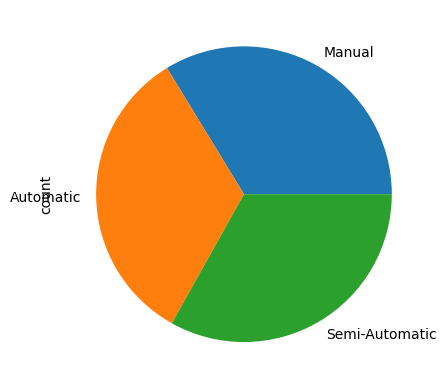

In [67]:
# Plot transmission distribution as pie chart
df["Transmission"].value_counts().plot(kind="pie")

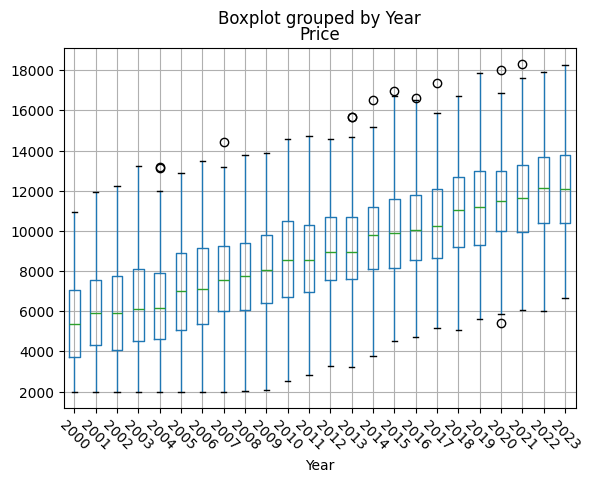

In [68]:
# Show boxplot of prices
df.boxplot(column='Price', by='Year', vert=True)
plt.xticks(rotation=-45)
plt.show()

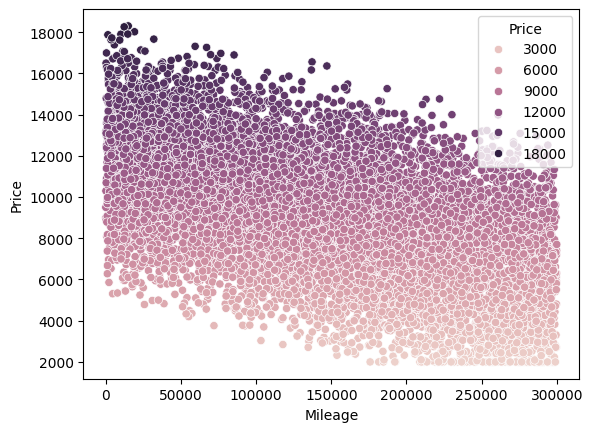

In [69]:
sns.scatterplot(x='Mileage', y='Price', hue='Price', data=df)
plt.show()

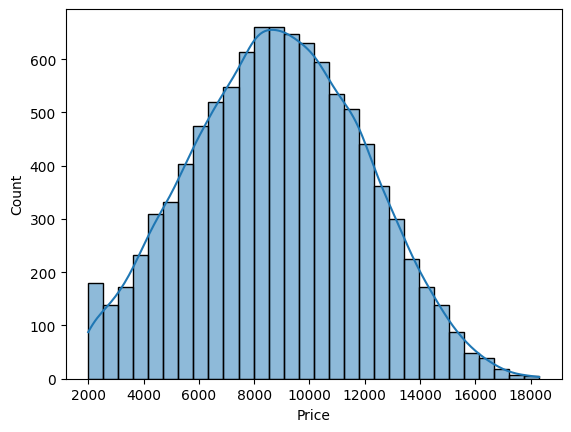

In [70]:
sns.histplot(df["Price"], bins=30, kde=True)
plt.show()

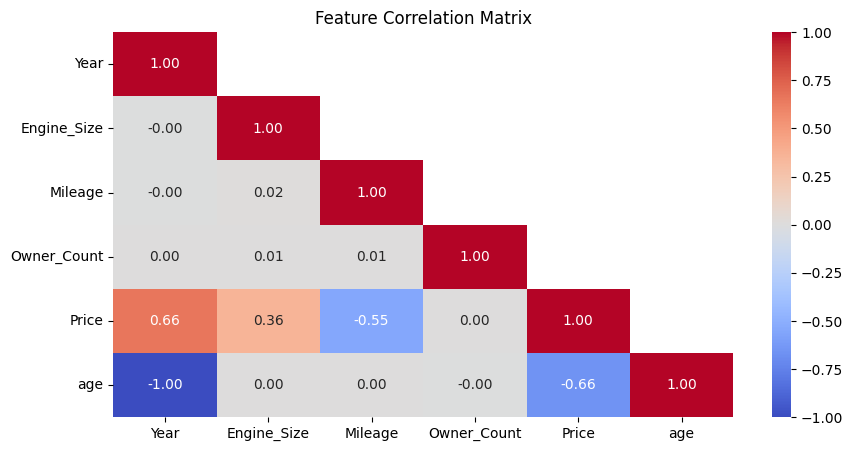

In [71]:
# Correlation heatmap (only numeric columns)
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()
lower_triangle_mask = np.triu(corr, k=1)

plt.figure(figsize=(10, 5))
sns.heatmap(corr, mask=lower_triangle_mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [72]:
# Filtering Examples
luxury_cars = df[df['Price'] > df['Price'].quantile(0.9)]
print("Luxury Cars (Top 10% by Price):")
luxury_cars.head()

Luxury Cars (Top 10% by Price):


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,age
16,Hyundai,Elantra,2017,2.9,Electric,Automatic,38133,5,2,14837,8
20,Chevrolet,Equinox,2018,1.8,Hybrid,Automatic,21261,2,1,13374,7
26,Audi,A3,2022,3.3,Electric,Manual,79350,5,3,14413,3
54,Kia,Optima,2020,3.2,Electric,Manual,88070,3,5,13538,5
62,Ford,Focus,2015,4.8,Electric,Automatic,100603,4,2,14887,10


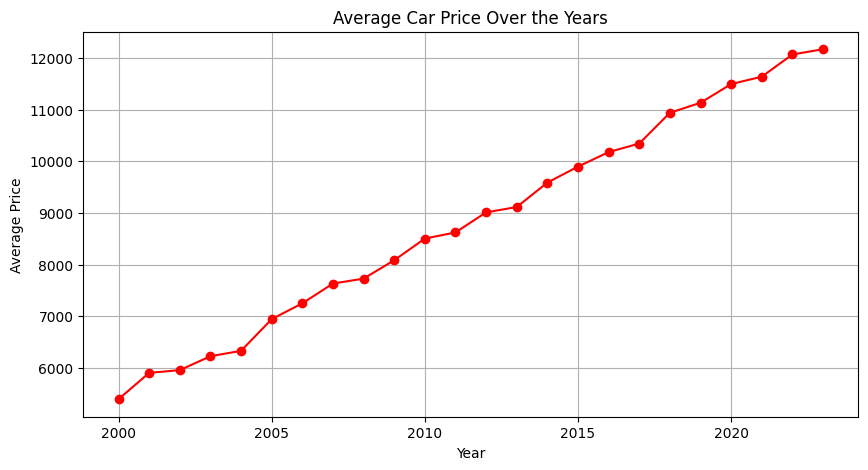

In [73]:
# Time Series Analysis: Average Price Per Year
plt.figure(figsize=(10, 5))
df.groupby('Year')['Price'].mean().plot(marker='o', linestyle='-', color='red')
plt.title("Average Car Price Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.grid()
plt.show()

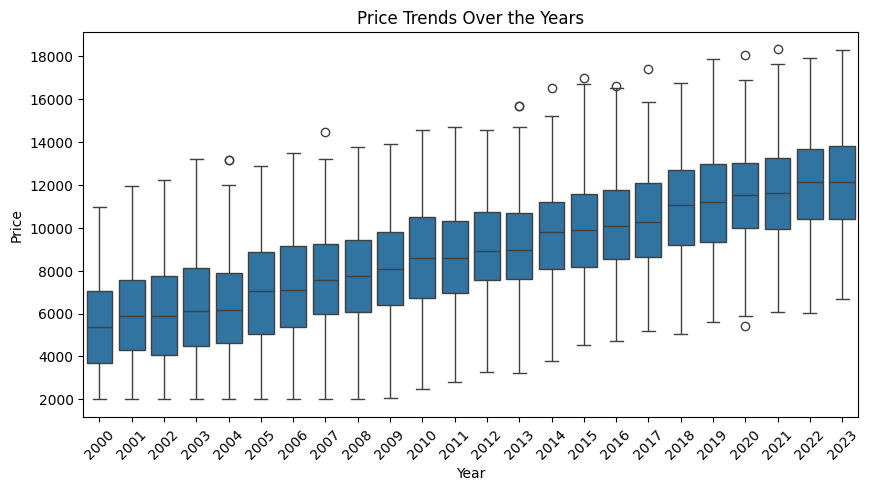

In [74]:
# Price Analysis
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Year'], y=df['Price'])
plt.xticks(rotation=45)
plt.title("Price Trends Over the Years")
plt.show()

Export dataframe to pickle format


In [75]:
df.to_pickle('car_price.pkl')

## Key Insights and Conclusions

### Brand Impact on Price
- Some brands have significantly higher average prices, indicating a strong correlation between brand reputation and car value.

### Price Trends Over Time
- Newer cars generally have higher prices, while older cars show more variation due to depreciation and condition.

### Car Distribution by Brand
- A few brands dominate the dataset, while others have a relatively small representation.

### Data Considerations and Limitations
- Additional factors like mileage, maintenance history, or regional price differences are not captured in this dataset, which could further refine insights.

### Next Steps for Further Analysis
- Use predictive modeling to estimate car prices based on historical data.
